<a href="https://colab.research.google.com/github/gitamgadtaula/F_S_E_C/blob/fsec/ARIMAx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Nov 25 16:48:15 2019

@author: gitamgadtaula
"""

import os
import warnings
!pip install pmdarima
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import numpy as np



dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
data = pd.read_csv("/content/drive/MyDrive/thesis dataset/ntc_monthly.csv")
data.columns = data.columns.str.title()
data['Date'] = pd.to_datetime(data['Date'])
data.shape()
# data=data
# data=data.iloc[::-1]




TypeError: 'tuple' object is not callable

In [90]:
# Simple Moving Average


def SMA(data, period=30, column='Close'):
    return data[column].rolling(window=period).mean()

# Exponential Moving Average
def EMA(data, period=30, column='Close'):
    return data[column].ewm(span=period, adjust=False).mean()

# Moving Average Convergence Divergence
def MACD(data, period_short=12, period_long=26, column='Close'):
    EMA_short = EMA(data, period_short, column)
    EMA_long = EMA(data, period_long, column)
    MACD_line = EMA_short - EMA_long
    signal_line = MACD_line.ewm(span=9, adjust=False).mean()
    return MACD_line, signal_line

# Relative Strength Index
def RSI(data, period=14, column='Close'):
    delta = data[column].diff()
    up, down = delta.copy(), delta.copy()
    up[up < 0] = 0
    down[down > 0] = 0
    average_gain = up.rolling(window=period).mean()
    average_loss = abs(down.rolling(window=period).mean())
    rs = average_gain / average_loss
    return 100 - (100 / (1 + rs))

# Bollinger Bands
def Bollinger_Bands(data, period=30, column='Close'):
    SMA = data[column].rolling(window=period).mean()
    std_dev = data[column].rolling(window=period).std()
    upper_band = SMA + (2 * std_dev)
    lower_band = SMA - (2 * std_dev)
    return upper_band, lower_band

# Stochastic Oscillator
def Stochastic_Oscillator(data, period=14):
    high = data['High'].rolling(window=period).max()
    low = data['Low'].rolling(window=period).min()
    close = data['Close']
    return 100 * ((close - low) / (high - low))

# On Balance Volume
def OBV(data, column='Close'):
    volume = data['Volume']
    change = data[column].diff()
    up, down = change.copy(), change.copy()
    up[up < 0] = 0
    down[down > 0] = 0
    return (volume * (up - down)).cumsum()

data['SMA'] = SMA(data)
data['EMA'] = EMA(data)

MACD_line, signal_line = MACD(data)
data['MACD'] = MACD_line
data['Signal Line'] = signal_line

data['RSI'] = RSI(data)
data['Upper Band'], data['Lower Band'] = Bollinger_Bands(data)
data['Stochastic Oscillator'] = Stochastic_Oscillator(data)
data['OBV'] = OBV(data)

data.dropna(inplace=True)

data.head()

,Symbol,Open,High,Low,Close,Percent_Change,Volume,Date,SMA,EMA,MACD,Signal Line,RSI,Upper Band,Lower Band,Stochastic Oscillator,OBV
29,NTC,664.0,670.0,585.0,588.0,0,105180,2014-06-30,581.400000,585.089386,34.022278,37.452499,56.549521,745.814615,416.985385,37.000000,75266390.0
30,NTC,588.0,658.0,580.0,641.0,0,165120,2014-07-31,588.233333,588.696522,32.526266,36.467253,64.788732,744.479543,431.987123,63.500000,84017750.0
31,NTC,641.0,652.0,616.0,630.0,0,170940,2014-08-31,594.266667,591.361263,30.106015,35.195005,63.888889,742.012892,446.520441,55.319149,85898090.0
32,NTC,630.0,640.0,595.0,634.0,0,56925,2014-09-30,602.066667,594.112149,28.185806,33.793165,60.960961,730.866895,473.266438,52.941176,86125790.0
33,NTC,634.0,645.0,608.0,619.0,0,31570,2014-10-30,606.200000,595.717817,25.163582,32.067249,56.973294,728.581427,483.818573,38.709677,86599340.0


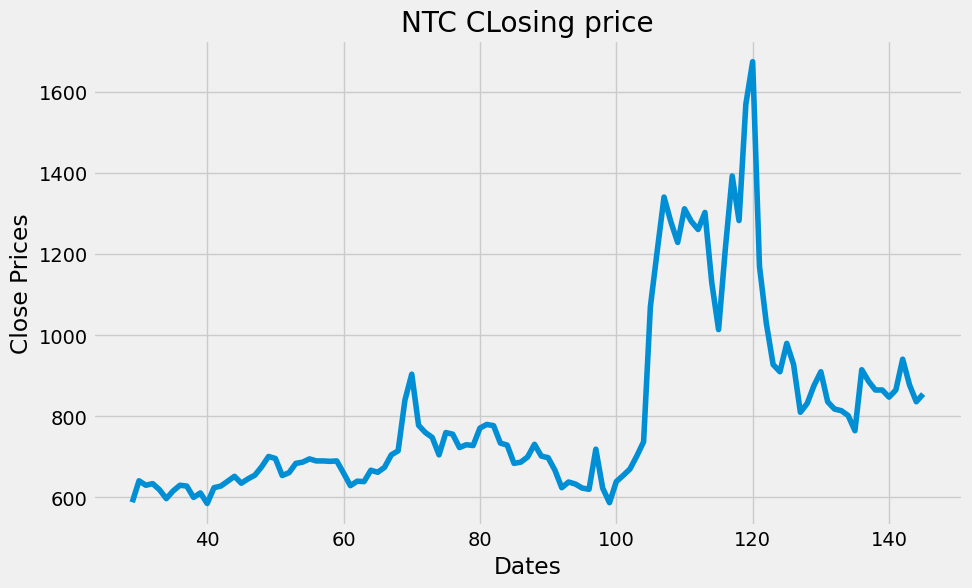

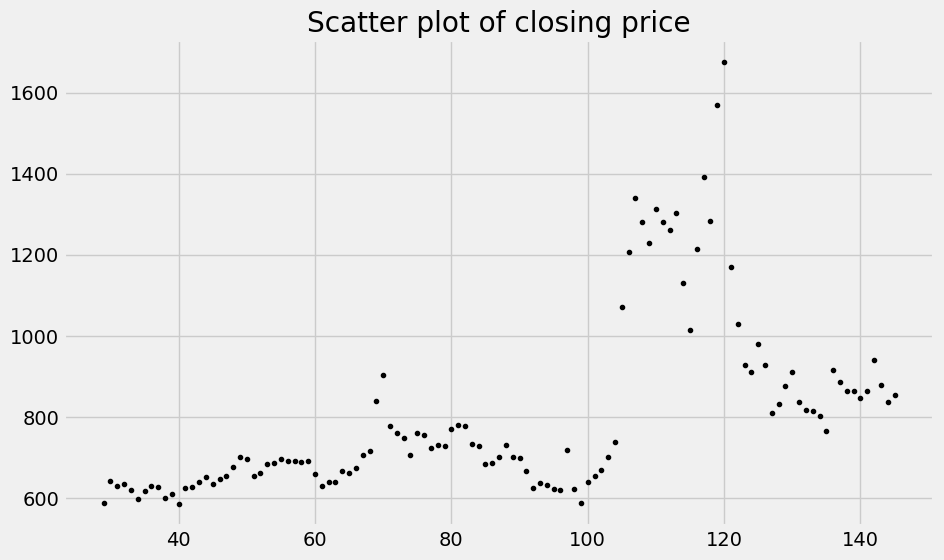

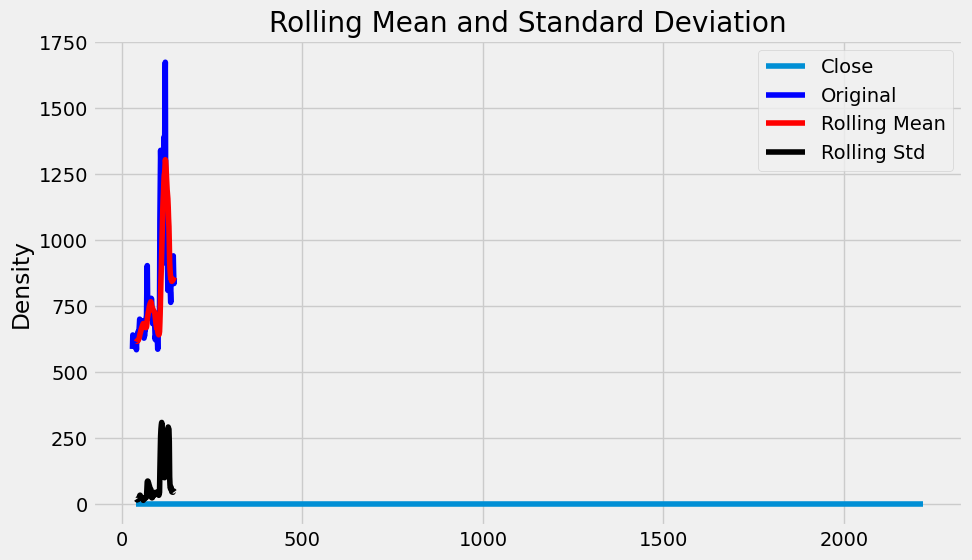

Results of dickey fuller test
Test Statistics                 -1.871959
p-value                          0.345365
No. of lags used                 4.000000
Number of observations used    112.000000
critical value (1%)             -3.490131
critical value (5%)             -2.887712
critical value (10%)            -2.580730
dtype: float64


<Figure size 1000x600 with 0 Axes>

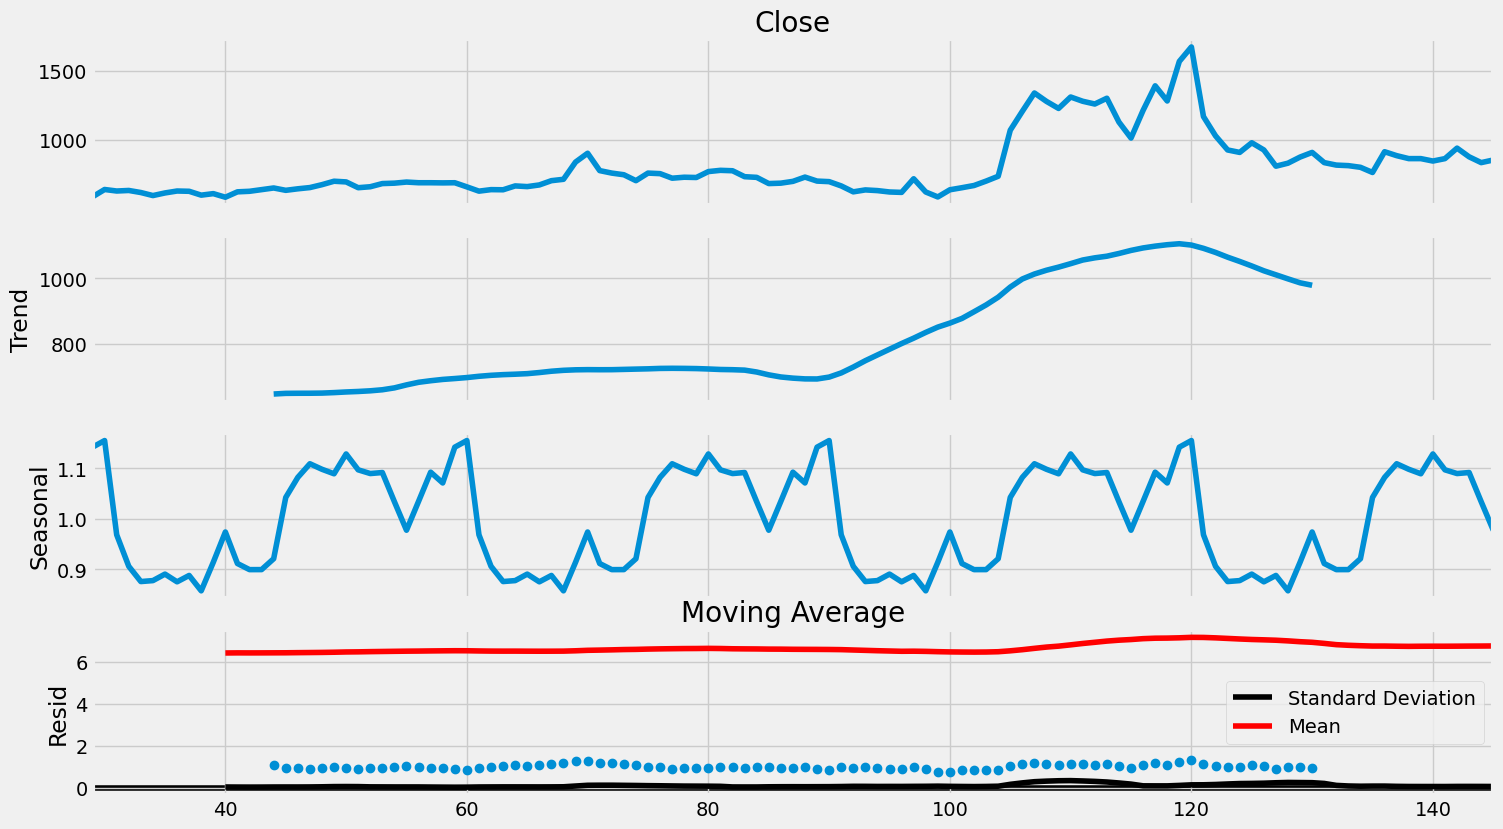

In [91]:

#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(data['Close'])
plt.title('NTC CLosing price')
plt.show()

#scatter plot of the sales
df_close = data['Close']
df_close.plot(style='k.')
plt.title('Scatter plot of closing price')
plt.show()

#Distribution of the dataset
df_close.plot(kind='kde')
#We can observe a near-normal distribution(bell-curve) over sales values.

#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)

    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

test_stationarity(df_close)

#To separate the trend and the seasonality from a time series,
# we can decompose the series using the following code.
result = seasonal_decompose(df_close, model='multiplicative', period = 30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(16, 9)


#if not stationary then eliminate trend
#Eliminate trend
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
# Taking the logarithm of the closing prices before fitting the model
df_log = np.log(df_close)
# df_log = (df_close)

moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()



In [92]:
df_log.tail(5)

141    6.762730
142    6.846943
143    6.777647
144    6.728629
145    6.751101
Name: Close, dtype: float64

In [93]:
import statsmodels.api as smapi

#split data into train and training set
# train_data, test_data = df_log[:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]

# Split the data into train and test sets
split_index = int(len(df_log) * 0.9)
train_data = df_log[:split_index]
test_data = df_log[split_index:]
test_dates = data['Date'][split_index:]

# Split the exogenous variables in the same way
exog_train = data[['Volume', 'SMA', 'EMA', 'MACD', 'RSI', 'Stochastic Oscillator', 'OBV']].iloc[:split_index]
exog_test = data[['Volume', 'SMA', 'EMA', 'MACD', 'RSI', 'Stochastic Oscillator', 'OBV']].iloc[split_index:]



In [94]:
# using Auto ARIMA to get the best parameters without even plotting ACF and PACF graphs.

#Auto ARIMA: Automatically discover the optimal order for an ARIMA model.

#The auto_arima function seeks to identify the most optimal parameters for an ARIMA model, and returns a fitted ARIMA model. This function is based on the commonly-used R function, forecast::auto.arima.

#The auro_arima function works by conducting differencing tests (i.e., Kwiatkowski–Phillips–Schmidt–Shin, Augmented Dickey-Fuller or Phillips–Perron) to determine the order of differencing, d, and then fitting models within ranges of defined start_p, max_p, start_q, max_q ranges. If the seasonal optional is enabled, auto_arima also seeks to identify the optimal P and Q hyper- parameters after conducting the Canova-Hansen to determine the optimal order of seasonal differencing, D.

model_autoARIMA = auto_arima(train_data, start_p=1, start_q=1,
                      max_d=3, max_p=5, max_q=5, seasonal=False,
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

print(model_autoARIMA.summary())

print("Auto-ARIMA Model Order:", model_autoARIMA.order)

p = model_autoARIMA.order[0]
d = model_autoARIMA.order[1]
q = model_autoARIMA.order[2]

# print("p:", p)
# print("d:", d)
# print("q:", q)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-225.573, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-222.443, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-222.561, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-223.702, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-224.290, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-224.472, Time=0.53 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-224.243, Time=0.27 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-225.893, Time=0.12 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-224.295, Time=0.21 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-222.317, Time=0.40 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-227.732, Time=0.27 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-225.585, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-226.096, Time=0.20 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=-226.158, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0]          

In [95]:
# Build ARIMAX Model
# model = smapi.tsa.arima.ARIMA(train_data, order=(0,1,0))

# print(data)
model = smapi.tsa.statespace.SARIMAX(train_data, order=(0,1,0), exog=exog_train)
fitted = model.fit()
print(fitted.summary())




                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  105
Model:               SARIMAX(0, 1, 0)   Log Likelihood                  24.706
Date:                Fri, 29 Mar 2024   AIC                            -33.411
Time:                        07:49:58   BIC                            -12.256
Sample:                             0   HQIC                           -24.841
                                - 105                                         
Covariance Type:                  opg                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Volume                 5.238e-08   5.39e-07      0.097      0.923      -1e-06    1.11e-06
SMA                       0.0036      0.008      0.434      0.664      -0.013       0.020
EMA     

In [96]:
# Determine the number of future periods you want to forecast
future_periods = len(test_data)

# Example: Generate future exogenous values based on historical data
# This is a simplified example. In practice, you might use more sophisticated methods.
exog_future = pd.DataFrame()

# For each exogenous variable, generate future values
for column in exog_test.columns:
    # Example: Use the last value of the variable to forecast the next period
    # This is a very basic method and might not be appropriate for all variables
    last_value = exog_test[column].iloc[-1]
    future_values = [last_value] * future_periods
    exog_future[column] = future_values



In [97]:
import matplotlib.dates as mdates

# Generate predictions
predictions = fitted.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1,exog=exog_future)

# Calculate evaluation metrics
mae = mean_absolute_error(test_data, predictions)
rmse = np.sqrt(mean_squared_error(test_data, predictions))
mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100

# Print the results
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")
print(predictions)
print(test_data)

MAE: 0.1520663881043518
RMSE: 0.16089563481160926
MAPE: nan%
105    6.603535
106    6.603535
107    6.603535
108    6.603535
109    6.603535
110    6.603535
111    6.603535
112    6.603535
113    6.603535
114    6.603535
115    6.603535
116    6.603535
Name: predicted_mean, dtype: float64
134    6.687109
135    6.639222
136    6.818924
137    6.787281
138    6.762730
139    6.762730
140    6.742173
141    6.762730
142    6.846943
143    6.777647
144    6.728629
145    6.751101
Name: Close, dtype: float64


In [98]:
forecast = fitted.forecast(len(test_data), exog=exog_future, return_conf_int=True)
predictions_original_scale = np.exp(forecast)
test_original_scale = np.exp(test_data)
forecast_original_scale = np.exp(test_data)



print(test_original_scale,forecast_original_scale)


134    802.0
135    764.5
136    915.0
137    886.5
138    865.0
139    865.0
140    847.4
141    865.0
142    941.0
143    878.0
144    836.0
145    855.0
Name: Close, dtype: float64 134    802.0
135    764.5
136    915.0
137    886.5
138    865.0
139    865.0
140    847.4
141    865.0
142    941.0
143    878.0
144    836.0
145    855.0
Name: Close, dtype: float64


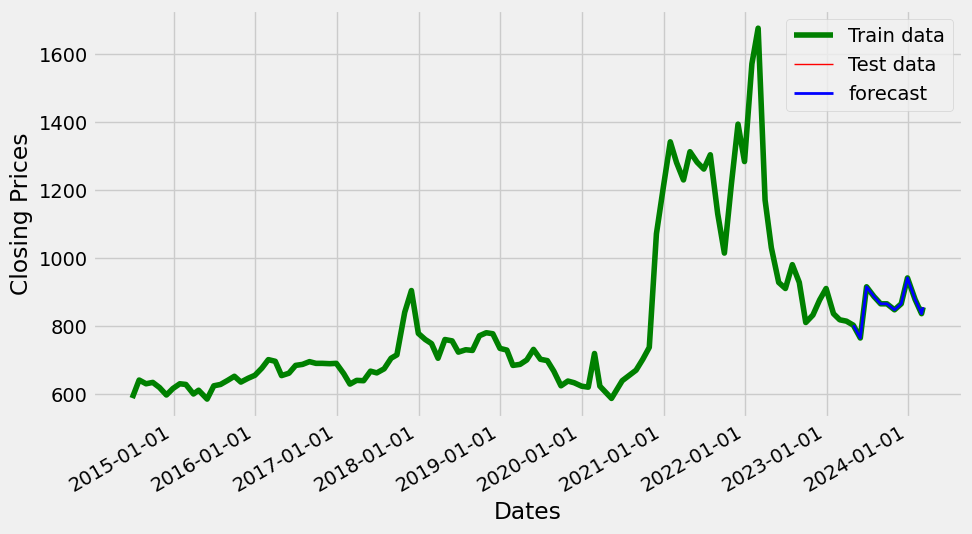

In [99]:
# Plot the predictions
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')

# Plotting the original scale predictions and CIs
plt.plot(data['Date'], data['Close'], 'green', label='Train data')
plt.plot(test_dates, test_original_scale, 'red', label='Test data',linewidth=1)
# plt.plot(test_dates, predictions_original_scale, 'red', label='Predictions')
plt.plot(test_dates, forecast_original_scale, 'blue', label='forecast',linewidth=2)

date_form = mdates.DateFormatter("%Y-%m-%d")
plt.gca().xaxis.set_major_formatter(date_form)
plt.gcf().autofmt_xdate()
plt.legend()
plt.show()